<h1>목차<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#(1)-데이터-로드" data-toc-modified-id="(1)-데이터-로드-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>(1) 데이터 로드</a></span></li><li><span><a href="#(2)-Data-Scaling" data-toc-modified-id="(2)-Data-Scaling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>(2) Data Scaling</a></span></li><li><span><a href="#(3)-상관분석" data-toc-modified-id="(3)-상관분석-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>(3) 상관분석</a></span></li><li><span><a href="#(4)-회귀분석" data-toc-modified-id="(4)-회귀분석-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>(4) 회귀분석</a></span></li><li><span><a href="#(5)-변수선택법" data-toc-modified-id="(5)-변수선택법-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>(5) 변수선택법</a></span></li><li><span><a href="#(6)-안전지수-산출" data-toc-modified-id="(6)-안전지수-산출-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>(6) 안전지수 산출</a></span></li></ul></div>

# 모델링(Modeling)

In [5]:
# 라이브러리 호출
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as mcl
import seaborn as sns
 
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline

# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

import warnings
warnings.filterwarnings('ignore')

In [6]:
print(os.getcwd())

C:\Users\samsung\TIL\DS\project\miniPJ\01_pj\data\final


In [7]:
os.chdir('C:/Users/samsung/TIL/DS/project/miniPJ/01_pj/data/final/')

In [8]:
# 데이터 로드
df_top5 = pd.read_csv('./df_security_concat_9.csv', encoding='cp949')
# df_top5.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)
df_top5

,state,city,visit_cnt,cctv_cnt,sclight_cnt,smalight_cnt,crime_rate,avg_pop_density,mean_hours,mean_days,new_state
0,강원도,정선군,8151609,515.0,4391.0,13.0,0.0271,90.36,427.8,1.62,강원도 정선군
1,강원도,평창군,13399820,190.0,6747.0,46.0,0.0271,90.36,395.8,1.62,강원도 평창군
2,강원도,홍천군,15125927,428.0,1191.0,37.0,0.0271,90.36,388.8,1.54,강원도 홍천군
3,강원도,양구군,1828609,296.0,190.0,22.0,0.0271,90.36,387.2,1.80,강원도 양구군
4,강원도,고성군,11612683,422.0,4391.0,94.0,0.0271,90.36,375.2,1.56,강원도 고성군
...,...,...,...,...,...,...,...,...,...,...,...
73,충청북도,제천시,12125010,979.0,9024.0,314.0,0.0299,219.20,324.8,1.60,충청북도 제천시
74,충청북도,보은군,4737641,316.0,6349.0,99.0,0.0299,219.20,298.2,1.54,충청북도 보은군
75,충청북도,충주시,14797862,1578.0,10600.0,219.0,0.0299,219.20,296.8,1.64,충청북도 충주시
76,충청북도,영동군,4133509,1.0,6076.0,112.0,0.0299,219.20,296.4,1.64,충청북도 영동군


In [11]:
df_top5_copy = df_top5.copy()
# df_top5_copy.drop([])
df_top5_copy = df_top5_copy.groupby(['state'], as_index=False).agg({
    'visit_cnt':'sum', 
    'cctv_cnt':'sum', 
    'sclight_cnt':'sum', 
    'smalight_cnt':'sum',
    'crime_rate':'mean', 
    'avg_pop_density':'mean', 
    'mean_hours':'mean', 
    'mean_days':'mean',
})
df_top5_copy
# type 바꾸기
df_top5_copy.loc[:, ['cctv_cnt', 'sclight_cnt', 'smalight_cnt']] = df_top5_copy.loc[:, ['cctv_cnt', 'sclight_cnt', 'smalight_cnt']].astype('int')
df_top5_copy.drop(['mean_days'], axis=1, inplace=True)
df_top5_copy

,state,visit_cnt,cctv_cnt,sclight_cnt,smalight_cnt,crime_rate,avg_pop_density,mean_hours
0,강원도,50118648,1851,16910,212,0.0271,90.36,394.96
1,경기도,126607094,16003,51854,2173,0.2489,1303.40,276.16
2,경상남도,49487026,5101,33514,275,0.0722,316.54,315.20
3,경상북도,19024802,2523,30588,226,0.0451,139.72,412.52
4,광주광역시,99400593,1720,42196,255,0.0283,2964.74,208.20
5,대구광역시,132201023,9128,57018,237,0.0494,2744.80,205.28
6,대전광역시,101756434,3550,60008,306,0.0307,2781.58,203.24
7,부산광역시,99646860,2198,22283,191,0.0767,4378.44,198.00
8,서울특별시,106405870,9226,47125,3826,0.1929,15899.10,226.12
9,세종특별자치시,18211355,1218,8029,23,0.0041,708.64,290.40


# 모델링

회귀분석_Final: 인구밀도 대비 요소 수치 산출 -> 회귀계수

### (1) 데이터 로드

In [9]:
# 범죄율 데이터 -> 범죄건수 데이터로 바꾸기
# 범죄건수 데이터 불러오기
crime2 = pd.read_csv("C:/Users/samsung/TIL/DS/project/miniPJ/01_pj/data/total_crime.csv", encoding='cp949')
crime2

,state,total_sum
0,강원도,27001
1,경기도,248351
2,경상남도,72048
3,경상북도,44981
4,광주광역시,28288
5,대구광역시,49329
6,대전광역시,30671
7,부산광역시,76522
8,서울특별시,192548
9,세종특별자치시,4107


In [12]:
df_top5_copy.head()

,state,visit_cnt,cctv_cnt,sclight_cnt,smalight_cnt,crime_rate,avg_pop_density,mean_hours
0,강원도,50118648,1851,16910,212,0.0271,90.36,394.96
1,경기도,126607094,16003,51854,2173,0.2489,1303.40,276.16
2,경상남도,49487026,5101,33514,275,0.0722,316.54,315.20
3,경상북도,19024802,2523,30588,226,0.0451,139.72,412.52
4,광주광역시,99400593,1720,42196,255,0.0283,2964.74,208.20


In [13]:
df_merge = pd.merge(df_top5_copy, crime2, how='outer', on='state')
df_merge.drop(['crime_rate'], axis=1, inplace=True)
df_merge.rename(columns={'total_sum':'crime_cnt'}, inplace=True)
df_merge.head(3)

,state,visit_cnt,cctv_cnt,sclight_cnt,smalight_cnt,avg_pop_density,mean_hours,crime_cnt
0,강원도,50118648,1851,16910,212,90.36,394.96,27001
1,경기도,126607094,16003,51854,2173,1303.40,276.16,248351
2,경상남도,49487026,5101,33514,275,316.54,315.20,72048


In [14]:
# 인구밀도로 나누기
df_merge['visit_pop'] = df_merge['visit_cnt']/df_merge['avg_pop_density']
df_merge['cctv_pop'] = df_merge['cctv_cnt']/df_merge['avg_pop_density']
df_merge['light_pop'] = df_merge['sclight_cnt']/df_merge['avg_pop_density']
df_merge['bell_pop'] = df_merge['smalight_cnt']/df_merge['avg_pop_density']
df_merge['crime_pop'] = df_merge['crime_cnt']/df_merge['avg_pop_density']
df_dPop = df_merge.drop(['visit_cnt', 'cctv_cnt', 'sclight_cnt', 'smalight_cnt', 'crime_cnt', 'avg_pop_density'], axis=1, inplace=False)
df_dPop

,state,mean_hours,visit_pop,cctv_pop,light_pop,bell_pop,crime_pop
0,강원도,394.96,554655.245684,20.484728,187.140328,2.346171,298.815848
1,경기도,276.16,97136.024244,12.277889,39.783643,1.667178,190.540893
2,경상남도,315.20,156337.353889,16.114867,105.876035,0.868769,227.611044
3,경상북도,412.52,136163.770398,18.057544,218.923561,1.617521,321.936731
4,광주광역시,208.20,33527.591964,0.580152,14.232614,0.086011,9.541477
5,대구광역시,205.28,48164.173346,3.325561,20.773098,0.086345,17.971801
6,대전광역시,203.24,36582.242467,1.276253,21.573350,0.110009,11.026467
7,부산광역시,198.00,22758.530435,0.502005,5.089256,0.043623,17.477001
8,서울특별시,226.12,6692.571907,0.580284,2.964004,0.240643,12.110623
9,세종특별자치시,290.40,25699.022070,1.718785,11.330154,0.032457,5.795608


### (2) Data Scaling

In [15]:
# scaler 라이브러리 호출
from sklearn.preprocessing import MinMaxScaler

In [16]:
# min-max scaler
df_x = df_dPop[['visit_pop', 'cctv_pop', 'light_pop', 'bell_pop', 'crime_pop']]
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(df_x)
transformed_x = scaler.transform(df_x)

new_coln = [i+'_mms' for i in df_x.columns]

df_mms = pd.concat([df_dPop, pd.DataFrame(scaler.fit_transform(df_x[df_x.columns]), columns=new_coln)], axis=1)
df_mms.drop(['visit_pop', 'cctv_pop', 'light_pop', 'bell_pop', 'crime_pop', 'mean_hours'], axis=1, inplace=True)
df_mms

,state,visit_pop_mms,cctv_pop_mms,light_pop_mms,bell_pop_mms,crime_pop_mms
0,강원도,1.000000,0.596344,0.537311,0.669186,0.926865
1,경기도,0.165054,0.351427,0.107417,0.472804,0.584376
2,경상남도,0.273093,0.465934,0.300233,0.241883,0.701634
3,경상북도,0.236277,0.523909,0.630034,0.458441,1.000000
4,광주광역시,0.048972,0.002332,0.032875,0.015489,0.011849
5,대구광역시,0.075683,0.084263,0.051956,0.015586,0.038515
6,대전광역시,0.054547,0.023106,0.054290,0.022430,0.016546
7,부산광역시,0.029319,0.000000,0.006200,0.003230,0.036950
8,서울특별시,0.000000,0.002336,0.000000,0.060213,0.019975
9,세종특별자치시,0.034686,0.036312,0.024407,0.000000,0.000000


### (3) 상관분석

In [17]:
# 정규성 검토

from scipy.stats import shapiro

for i in ['visit_pop_mms', 'cctv_pop_mms', 'light_pop_mms', 'bell_pop_mms']:
    print('shapiro-test: ', i)
    print(shapiro(df_mms[i]))
    print('\n')
    

shapiro-test:  visit_pop_mms
ShapiroResult(statistic=0.8282802700996399, pvalue=0.005089908838272095)


shapiro-test:  cctv_pop_mms
ShapiroResult(statistic=0.8692126274108887, pvalue=0.02134789153933525)


shapiro-test:  light_pop_mms
ShapiroResult(statistic=0.8394023180007935, pvalue=0.0074226828292012215)


shapiro-test:  bell_pop_mms
ShapiroResult(statistic=0.8569294214248657, pvalue=0.013703285716474056)




In [18]:
# 상관분석
import scipy.stats as stats

for i in ['visit_pop_mms', 'cctv_pop_mms', 'light_pop_mms', 'bell_pop_mms']:
    print(i)
    print('\n')
    y = df_mms.crime_pop_mms
    x = df_mms[i]
    print('< Pearson corrcoef >')
    print('Correlation: {:.2f}'.format(stats.pearsonr(x,y)[0]))
    print('P-value: {:.4f}'.format(stats.pearsonr(x,y)[1]))
    print('\n')
    print('< Spearman corrcoef >')
    print('Correlation: {:.2f}'.format(stats.spearmanr(x,y)[0]))
    print('P-value: {:.4f}'.format(stats.spearmanr(x,y)[1]))
    print('\n')
    print('\n')
    print('\n')

visit_pop_mms


< Pearson corrcoef >
Correlation: 0.70
P-value: 0.0017


< Spearman corrcoef >
Correlation: 0.78
P-value: 0.0002






cctv_pop_mms


< Pearson corrcoef >
Correlation: 0.78
P-value: 0.0002


< Spearman corrcoef >
Correlation: 0.82
P-value: 0.0000






light_pop_mms


< Pearson corrcoef >
Correlation: 0.77
P-value: 0.0003


< Spearman corrcoef >
Correlation: 0.81
P-value: 0.0001






bell_pop_mms


< Pearson corrcoef >
Correlation: 0.52
P-value: 0.0338


< Spearman corrcoef >
Correlation: 0.65
P-value: 0.0044








### (4) 회귀분석

In [20]:
# !pip install statsmodels
import statsmodels.api as sm
from sklearn import linear_model
import statsmodels.formula.api as smf

In [21]:
# 회귀분석
y = df_mms.crime_pop_mms
x = df_mms[['visit_pop_mms', 'cctv_pop_mms', 'light_pop_mms', 'bell_pop_mms']]

xc = sm.add_constant(x)
lr = sm.OLS(y, xc)
model = lr.fit()

print(model.summary())

# Durbin-Watson(더 빈 왓슨, DW검정): 1.5~2.5 사이 => 잔차의 독립성 => 회귀모형 적합함
# R-squeared가 0.4 이상, p-value가 0.05 보다 작다면 유의한 결과

                            OLS Regression Results                            
Dep. Variable:          crime_pop_mms   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     6.299
Date:                Wed, 08 Mar 2023   Prob (F-statistic):            0.00571
Time:                        15:35:10   Log-Likelihood:                 3.7825
No. Observations:                  17   AIC:                             2.435
Df Residuals:                      12   BIC:                             6.601
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0388      0.085      0.457

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [315]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif

,VIF Factor,features
0,4.259180,visit_pop_mms
1,12.896509,cctv_pop_mms
2,9.194692,light_pop_mms
3,4.517233,bell_pop_mms


### (5) 변수선택법

In [318]:
from sklearn.model_selection import train_test_split

def get_model1(seed):
    df_train, df_test = train_test_split(df_mms, test_size=0.5, random_state=seed)
    model = sm.OLS.from_formula("crime_pop_mms ~ visit_pop_mms + cctv_pop_mms + light_pop_mms + bell_pop_mms", data=df_train)
    return df_train, df_test, model.fit()


df_train, df_test, result1 = get_model1(3)
print(result1.summary())


                            OLS Regression Results                            
Dep. Variable:          crime_pop_mms   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     2.754
Date:                Tue, 07 Mar 2023   Prob (F-statistic):              0.216
Time:                        16:06:51   Log-Likelihood:                 2.0068
No. Observations:                   8   AIC:                             5.986
Df Residuals:                       3   BIC:                             6.384
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0341      0.181      0.189

In [320]:
def calc_r2(df_test, result):
    target = df_mms.loc[df_test.index].crime_pop_mms
    predict_test = result.predict(df_test)
    RSS = ((predict_test - target)**2).sum()
    TSS = ((target - target.mean())**2).sum()
    return 1 - RSS / TSS


test1 = []
for i in range(10):
    df_train, df_test, result = get_model1(i)
    test1.append(calc_r2(df_test, result))

test1

[0.08720822746824763,
 0.09784059090769781,
 0.5593819105427935,
 0.0009507180207251054,
 0.494510685724205,
 -4.381125045202006,
 0.049839435143007704,
 -16.527970654899914,
 -2.1206359195264715,
 -1.4169854928681804]

In [321]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

dfX = df_mms[['visit_pop_mms', 'cctv_pop_mms', 'light_pop_mms', 'bell_pop_mms']]
dfy = df_mms.crime_pop_mms

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dfX, i) for i in range(dfX.shape[1])]
vif["features"] = dfX.columns
vif

,VIF Factor,features
0,4.259180,visit_pop_mms
1,12.896509,cctv_pop_mms
2,9.194692,light_pop_mms
3,4.517233,bell_pop_mms


In [332]:
def get_model2(seed):
    df_train, df_test = train_test_split(df_mms, test_size=0.5, random_state=seed)
    model = sm.OLS.from_formula("crime_pop_mms ~ visit_pop_mms + light_pop_mms + bell_pop_mms", data=df_train)
    return df_train, df_test, model.fit()


df_train, df_test, result2 = get_model2(2)
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:          crime_pop_mms   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     1.479
Date:                Tue, 07 Mar 2023   Prob (F-statistic):              0.347
Time:                        16:14:34   Log-Likelihood:                 3.1646
No. Observations:                   8   AIC:                             1.671
Df Residuals:                       4   BIC:                             1.989
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0663      0.143      0.464

In [333]:
test2 = []
for i in range(10):
    df_train, df_test, result = get_model2(i)
    test2.append(calc_r2(df_test, result))

test2

[0.24895751562011958,
 0.20038741032417784,
 0.5444307541008195,
 0.16345654488852746,
 0.5075139053799114,
 0.3583855054226639,
 0.20716380226331055,
 -10.587504036004704,
 -0.7570746756422266,
 -12.890724235591076]

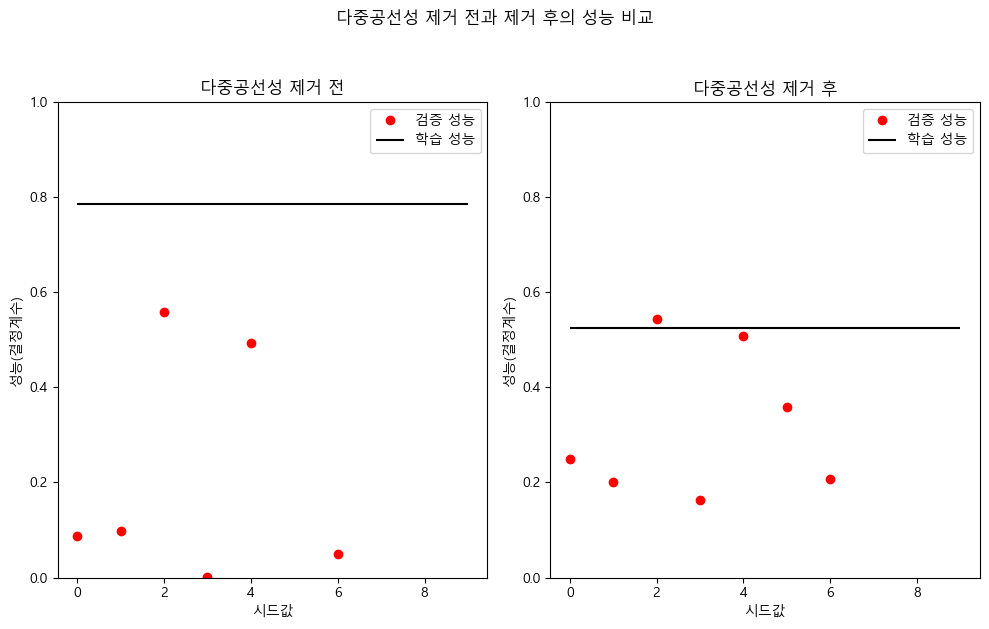

<Figure size 640x480 with 0 Axes>

In [415]:
fig, ax = plt.subplots(figsize=(10,6)) 

plt.subplot(121)
plt.plot(test1, 'ro', label="검증 성능")
plt.hlines(result1.rsquared, 0, 9, label="학습 성능", color='k')
plt.legend()
plt.xlabel("시드값")
plt.ylabel("성능(결정계수)")
plt.title("다중공선성 제거 전")
plt.ylim(0.0, 1.0)

plt.subplot(122)
plt.plot(test2, 'ro', label="검증 성능")
plt.hlines(result2.rsquared, 0, 9, label="학습 성능", color='k')
plt.legend()
plt.xlabel("시드값")
plt.ylabel("성능(결정계수)")
plt.title("다중공선성 제거 후")
plt.ylim(0.0, 1.0)

plt.suptitle("다중공선성 제거 전과 제거 후의 성능 비교", y=1.04)
plt.tight_layout()
plt.show()

# plt.savefig('C:/Users/samsung/TIL/DS/project/miniPJ/01_pj/results/eda/multicorr_result.png', dpi = 300)

In [ ]:
x_pred = np.linspace(df_mms['visit_pop_mms'].min(), df_mms['visit_pop_mms'].max(), 0.05)
x_pred = np.linspace(df_mms['visit_pop_mms'].min(), df_mms['visit_pop_mms'].max(), 0.05)


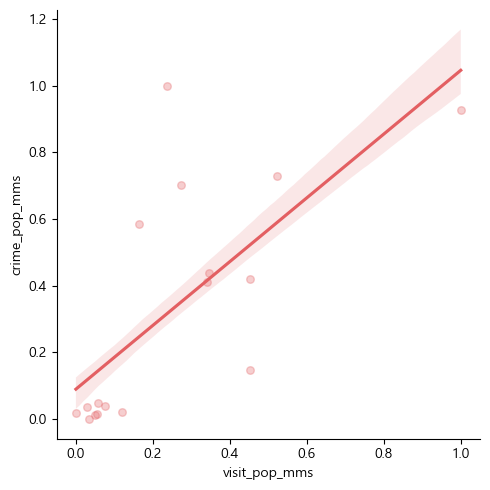

In [23]:
# 회귀선 그래프
x1 = sns.lmplot(data = df_mms, 
                x = 'visit_pop_mms', y = 'crime_pop_mms', 
                ci=50,
                scatter_kws={'s':30, 'alpha': 0.3, 'color':'#e35f62'},
                line_kws={'color': '#e35f62'},
               )
# plt.savefig('C:/Users/samsung/TIL/DS/project/miniPJ/01_pj/results/eda/reg_line.png', dpi = 300)

### (6) 안전지수 산출
* cctv 제외

In [347]:
df_final = df_mms.drop(['cctv_pop_mms'], axis=1, inplace=False)
df_final

,state,visit_pop_mms,light_pop_mms,bell_pop_mms,crime_pop_mms
0,강원도,1.000000,0.537311,0.669186,0.926865
1,경기도,0.165054,0.107417,0.472804,0.584376
2,경상남도,0.273093,0.300233,0.241883,0.701634
3,경상북도,0.236277,0.630034,0.458441,1.000000
4,광주광역시,0.048972,0.032875,0.015489,0.011849
5,대구광역시,0.075683,0.051956,0.015586,0.038515
6,대전광역시,0.054547,0.054290,0.022430,0.016546
7,부산광역시,0.029319,0.006200,0.003230,0.036950
8,서울특별시,0.000000,0.000000,0.060213,0.019975
9,세종특별자치시,0.034686,0.024407,0.000000,0.000000


In [348]:
# 최종 회귀모델 계수
result2.params

Intercept        0.066332
visit_pop_mms   -0.012501
light_pop_mms    0.723127
bell_pop_mms     0.011359
dtype: float64

In [365]:
result2.params[0]  # Intercept
result2.params[1]  # visit_pop_mms
result2.params[2]  # light_pop_mms
result2.params[3]  # bell_pop_mms

0.011359105162190186

In [366]:
df_final.columns

Index(['state', 'visit_pop_mms', 'light_pop_mms', 'bell_pop_mms',
       'crime_pop_mms'],
      dtype='object')

In [368]:
df_final['G_index'] = (df_final['visit_pop_mms']*result2.params[1]) + (df_final['light_pop_mms']*result2.params[2]) + (df_final['bell_pop_mms']*result2.params[3])
df_final

,state,visit_pop_mms,light_pop_mms,bell_pop_mms,crime_pop_mms,G_index
0,강원도,1.000000,0.537311,0.669186,0.926865,0.383644
1,경기도,0.165054,0.107417,0.472804,0.584376,0.080983
2,경상남도,0.273093,0.300233,0.241883,0.701634,0.216440
3,경상북도,0.236277,0.630034,0.458441,1.000000,0.457849
4,광주광역시,0.048972,0.032875,0.015489,0.011849,0.023336
5,대구광역시,0.075683,0.051956,0.015586,0.038515,0.036802
6,대전광역시,0.054547,0.054290,0.022430,0.016546,0.038832
7,부산광역시,0.029319,0.006200,0.003230,0.036950,0.004154
8,서울특별시,0.000000,0.000000,0.060213,0.019975,0.000684
9,세종특별자치시,0.034686,0.024407,0.000000,0.000000,0.017216


In [389]:
t = df_final.G_index.index
t

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], dtype='int64')

In [398]:
df_g = df_final.drop(['visit_pop_mms', 'light_pop_mms', 'bell_pop_mms', 'crime_pop_mms'], axis=1, inplace=False)
df_g = df_g.sort_values(by='G_index', ascending=True, ignore_index=True)
df_g

,state,G_index
0,서울특별시,0.000684
1,부산광역시,0.004154
2,인천광역시,0.016707
3,세종특별자치시,0.017216
4,광주광역시,0.023336
5,대구광역시,0.036802
6,대전광역시,0.038832
7,울산광역시,0.064841
8,경기도,0.080983
9,제주특별자치도,0.187112


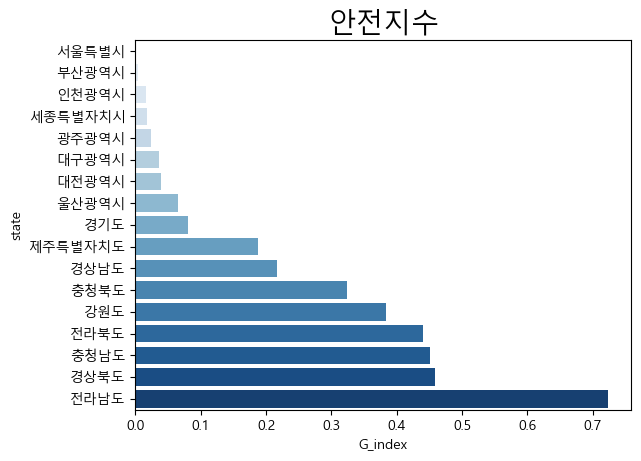

In [417]:
sns.barplot(data=df_g,
           y='state', x='G_index',
           palette='Blues',
           ).set_title('안전지수', fontsize=20)

# plt.savefig('C:/Users/samsung/TIL/DS/project/miniPJ/01_pj/results/eda/g_index.png', dpi = 300)

In [369]:
# df_final.to_csv("C:/Users/samsung/TIL/DS/project/miniPJ/01_pj/data/df_G_index.csv", index=False, encoding='cp949')

In [ ]:
# end-of-file